# Data Exploration

In [ ]:
!pip install dask["complete"]

In [1]:
!pip install 'bokeh==0.13.0'
# restart the notebook for the packages to be updated 

In [14]:
import os

# Dataframes
import v3io_frames as v3f
import dask.dataframe as dd
from dask.distributed import Client, progress
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt; plt.rcdefaults()
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.layouts import column, row, gridplot
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral11
import seaborn as sns; sns.set()


output_notebook()
%matplotlib inline

Loading BokehJS ...

## Explore data
Access the time-series and run a queries to learn about the data

In [15]:
client = v3f.Client('framesd:8081')
client.read(backend='tsdb', query='select sum(throughput) from netops_metrics_jupyter',
            start="now-2d", end='now+1d', multi_index=True)

sum(throughput)
time                company         data_center        device                        
2019-04-23 04:12:04 Kelly-Arroyo    Nicholas_Courts    3669819894699    126202.236999
                    Henderson-Lopez Rogers_Route       0236137499649    124275.859492
                    Kelly-Arroyo    Mclaughlin_Gateway 5804822255480    131045.365094
                    Henderson-Lopez Rogers_Route       7124057837347    149750.513160
                                    Spencer_Greens     9909774422784    130415.846188
                    Kelly-Arroyo    Nicholas_Courts    3440493824847    131363.705661
                                    Mclaughlin_Gateway 2190949003307    130614.112455
                    Henderson-Lopez Spencer_Greens     0063085034865    140214.559380

In [16]:
# read the devices table 
devicedf = client.read(backend='kv', table='netops_devices')
devicedf.head()

,company,data_center
__name,,
3669819894699,Kelly-Arroyo,Nicholas_Courts
9909774422784,Henderson-Lopez,Spencer_Greens
7124057837347,Henderson-Lopez,Rogers_Route
5804822255480,Kelly-Arroyo,Mclaughlin_Gateway
0063085034865,Henderson-Lopez,Spencer_Greens


## Sample device
Select a single device and explore its parameters

In [17]:
# use the first device ID for exploration
first_device = devicedf.index.values[0]
query = "select * from netops_metrics_jupyter where device='{}'".format(first_device)
sample_device = client.read(backend='tsdb', query=query, start="now-2d", end='now+1d', multi_index=True)
sample_device.head()

,,,,throughput,is_error,latency_is_error,throughput_is_error,cpu_utilization_is_error,packet_loss,latency,packet_loss_is_error,cpu_utilization
time,company,data_center,device,,,,,,,,,
2019-04-24 16:29:53.996,Kelly-Arroyo,Nicholas_Courts,3669819894699,265.800801,0.0,0.0,0.0,0.0,0.403987,0.000000,0.0,74.254264
2019-04-24 16:29:59.996,Kelly-Arroyo,Nicholas_Courts,3669819894699,249.800458,0.0,0.0,0.0,0.0,1.475127,7.743118,0.0,70.154689
2019-04-24 16:30:05.996,Kelly-Arroyo,Nicholas_Courts,3669819894699,280.303215,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,63.240241
2019-04-24 16:30:11.996,Kelly-Arroyo,Nicholas_Courts,3669819894699,265.751741,0.0,0.0,0.0,0.0,3.128822,0.000000,0.0,73.715061
2019-04-24 16:30:17.996,Kelly-Arroyo,Nicholas_Courts,3669819894699,265.368233,0.0,0.0,0.0,0.0,4.364029,2.028200,0.0,69.514624


Reading as CSV file and processing in parallel with Dask

### Examine Metrics

In [18]:
sample_component_performance = sample_device['cpu_utilization'] 
p = figure(title="Sample Performance Generation [ CPU Utilization ]",
            x_axis_label="ticks",
            y_axis_label="CPU Utilization (%)",
            width=1200)
p.line(x=range(len(sample_component_performance)), 
    y=sample_component_performance, 
    legend="Utilization (%)")
show(p)
print(sample_component_performance.describe())

count    601.000000
mean      76.506100
std       15.362174
min       33.470225
25%       64.535684
50%       73.514808
75%       87.529138
max      100.000000
Name: cpu_utilization, dtype: float64


In [19]:
sample_component_performance = sample_device['latency']
p = figure(title="Sample Performance Generation [ Latency ]",
            x_axis_label="ticks",
            y_axis_label="Latency (ms)",
            width=1200)
p.line(x=range(len(sample_component_performance)), 
    y=sample_component_performance, 
    legend="Latency (ms)")
show(p)
print(sample_component_performance.describe())

count    601.000000
mean      21.710850
std       39.426454
min        0.000000
25%        0.000000
50%        1.829684
75%        7.493588
max      100.000000
Name: latency, dtype: float64


In [20]:
sample_component_performance = sample_device['packet_loss']
p = figure(title="Sample Performance Generation [ Packet loss ]",
            x_axis_label="ticks",
            y_axis_label="Packet loss",
            width=1200)
p.line(x=range(len(sample_component_performance)), 
    y=sample_component_performance, 
    legend="Packet loss")
show(p)
print(sample_component_performance.describe())

count    601.000000
mean      10.242381
std       19.387620
min        0.000000
25%        0.000000
50%        0.658445
75%        3.040133
max       50.000000
Name: packet_loss, dtype: float64


In [21]:
sample_component_performance = sample_device['throughput']
p = figure(title="Sample Performance Generation [ Throughput ]",
            x_axis_label="ticks",
            y_axis_label="Throughput",
            width=1200)
p.line(x=range(len(sample_component_performance)), 
    y=sample_component_performance, 
    legend="Throughput")
show(p)
print(sample_component_performance.describe())

count    601.000000
mean     209.987083
std       94.010547
min        0.000000
25%      225.579187
50%      246.048201
75%      261.153855
max      300.000000
Name: throughput, dtype: float64


In [22]:
sample_component_performance = sample_device['is_error']
p = figure(title="Sample Performance Generation [ All + Error ]",
            x_axis_label="ticks",
            y_axis_label="Metrics",
            width=1200)
p.line(x=range(len(sample_component_performance)), 
    y=sample_component_performance-5, 
    legend="Error",
    color='red')
p.line(x=range(len(sample_component_performance)), 
    y=sample_device['cpu_utilization'], 
    legend="cpu_utilization",
    color='blue')
p.line(x=range(len(sample_component_performance)), 
    y=sample_device['latency'], 
    legend="latency",
    color='green')
p.line(x=range(len(sample_component_performance)), 
    y=sample_device['throughput'], 
    legend="throughput",
    color='black')
p.line(x=range(len(sample_component_performance)), 
    y=sample_device['packet_loss'], 
    legend="packet_loss",
    color='orange')
show(p)

## Find Correlations Using Parallel Processing
in order to find correlation we will use Dask, a parallel python computation framework <br>
Dask can run in the same container or on a multi-node cluster, we demonstrate a local environment<br>
for a distributed cluster configuration make sure the dask service is deployed on your Kubernetes<br>
use `Client('dask-scheduler:8786')` for a cluster or `Client()` for Dask local

In [23]:
dask_client = Client()
dask_client

Client Scheduler: tcp://127.0.0.1:43222 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 32.73 GB


In [24]:
df = dd.from_pandas(client.read(backend='tsdb', query='select * from netops_metrics_jupyter',
            start="now-2d", end='now+1d', multi_index=True).reset_index(), npartitions=4)
df.head()

,time,data_center,device,company,latency,throughput,throughput_is_error,cpu_utilization_is_error,is_error,packet_loss,cpu_utilization,packet_loss_is_error,latency_is_error
0,2019-04-24 16:29:53.996,Spencer_Greens,9909774422784,Henderson-Lopez,0.000000,270.349839,0.0,0.0,0.0,1.880730,69.491442,0.0,0.0
1,2019-04-24 16:29:59.996,Spencer_Greens,9909774422784,Henderson-Lopez,0.000000,200.724432,0.0,0.0,0.0,0.187542,82.425018,0.0,0.0
2,2019-04-24 16:30:05.996,Spencer_Greens,9909774422784,Henderson-Lopez,1.029673,265.474450,0.0,0.0,0.0,0.000000,60.817191,0.0,0.0
3,2019-04-24 16:30:11.996,Spencer_Greens,9909774422784,Henderson-Lopez,0.000000,268.298557,0.0,0.0,0.0,0.035432,66.563655,0.0,0.0
4,2019-04-24 16:30:17.996,Spencer_Greens,9909774422784,Henderson-Lopez,2.279885,261.555663,0.0,0.0,0.0,2.438059,77.089529,0.0,0.0


In [25]:
X = df.compute()
correlations = X[['cpu_utilization', 'latency', 'throughput', 'packet_loss', 'is_error']].corr()
correlations

,cpu_utilization,latency,throughput,packet_loss,is_error
cpu_utilization,1.000000,0.625311,-0.548255,0.598781,0.571336
latency,0.625311,1.000000,-0.759614,0.817682,0.796689
throughput,-0.548255,-0.759614,1.000000,-0.787527,-0.885297
packet_loss,0.598781,0.817682,-0.787527,1.000000,0.839758
is_error,0.571336,0.796689,-0.885297,0.839758,1.000000


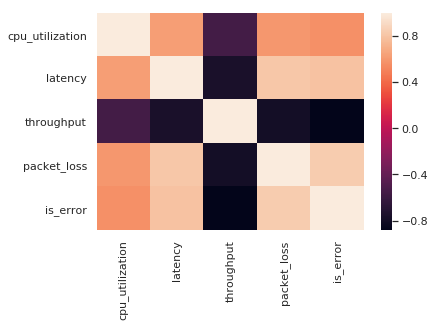

In [26]:
sns.heatmap(correlations)